In [253]:
import pymongo
import numpy as np
import pandas as pd
import time
dbClient = pymongo.MongoClient("python-binance.asuscomm.com:54321", username="kbai", password="9nurEfE1Ssy")
binanceDB = dbClient["binance"]
tradeCollection = binanceDB["AllBNBUSDT"]


In [7]:
symbol = 'ETHUSDT'
myquery = { "s" : symbol}
t0 = time.time()
df = pd.DataFrame(list(tradeCollection.find()))
t1= time.time()

In [8]:
len(df)

5724884

In [9]:
def preprocess(df):
    df[['p','q','T']] = df[['p','q','T']].astype(float)
    df['T'] = pd.to_datetime(df['T']*1000000)
    df.dropna(how='any', subset = ['p','q','T'], inplace=True)

In [10]:
preprocess(df)

In [70]:
dfgb = df.dropna(how='any', subset=['q','p','s','T']).groupby(['s',pd.Grouper(key='T',freq='5min')]).
apply(lambda x: np.sum(x['q']))

In [85]:
np.average?

In [101]:
dfss = df.groupby([pd.Grouper(key='T',freq='5min'),'s']).agg(
    {'q': {'volume':'sum'}, 
    'p': {'high':'max','low':'min','open':'first','close':"last", 'wavgp': lambda x: np.average(x,weights=df.loc[x.index, "q"])}})

In [115]:
dfss.unstack(level=1)

q                                            p  \
                        volume                                         high   
s                      BNBUSDT     BTCUSDT     ETHUSDT     LTCUSDT  BNBUSDT   
T                                                                             
2020-10-05 06:00:00   3648.556   52.464449   773.36363   323.46304  29.0538   
2020-10-05 06:05:00  10685.913  287.653152  9788.89793  8763.15252  29.0408   
2020-10-05 06:10:00  11725.619  128.023822  2010.30410  1551.66363  28.9614   
2020-10-05 06:15:00  13566.993  192.600547  2430.15761  1303.70530  28.8196   
2020-10-05 06:20:00  14159.783  369.665480  3272.77772   474.58959  28.8229   
...                        ...         ...         ...         ...      ...   
2020-10-09 03:45:00   3550.786   76.038749   666.56223   490.94992  27.9318   
2020-10-09 03:50:00   4042.749   73.119361   653.49205   614.05721  27.9580   
2020-10-09 03:55:00   4770.733   92.021778  1295.72073   530.71067  27.9485   
2020-10-09 04:00:00   5422.387   87.313296  2199.97687  1153.42336  27.8848   
2020-10-09 04:05:00   5270.592   35.063504   832.46588   461.00459  27.8728   

                                                                  ...          \
                                                   low            ...    open   
s                     BTCUSDT ETHUSDT LTCUSDT  BNBUSDT   BTCUSDT  ... ETHUSDT   
T                                                                 ...           
2020-10-05 06:00:00  10669.36  352.06   46.29  28.9581  10655.87  ...  351.96   
2020-10-05 06:05:00  10663.21  351.64   46.26  28.9050  10633.33  ...  351.53   
2020-10-05 06:10:00  10649.25  350.33   46.11  28.8102  10632.68  ...  350.33   
2020-10-05 06:15:00  10641.45  349.74   46.09  28.7195  10626.00  ...  349.74   
2020-10-05 06:20:00  10634.26  349.53   46.07  28.7100  10616.20  ...  349.53   
...                       ...     ...     ...      ...       ...  ...     ...   
2020-10-09 03:45:00  10895.24  350.75   47.02  27.8879  10888.14  ...  350.64   
2020-10-09 03:50:00  10896.36  350.71   47.03  27.9198  10891.44  ...  350.68   
2020-10-09 03:55:00  10896.26  350.52   47.03  27.8418  10885.67  ...  350.51   
2020-10-09 04:00:00  10893.00  350.82   46.96  27.8130  10880.00  ...  349.94   
2020-10-09 04:05:00  10890.53  350.67   46.96  27.8242  10883.28  ...  350.67   

                                                                           \
                               close                                wavgp   
s                   LTCUSDT  BNBUSDT   BTCUSDT ETHUSDT LTCUSDT    BNBUSDT   
T                                                                           
2020-10-05 06:00:00   46.28  28.9732  10657.57  351.49   46.20  29.003075   
2020-10-05 06:05:00   46.21  28.9648  10649.24  350.32   46.08  28.966363   
2020-10-05 06:10:00   46.09  28.8103  10633.77  349.73   46.04  28.870076   
2020-10-05 06:15:00   46.03  28.7878  10634.27  349.52   46.04  28.777803   
2020-10-05 06:20:00   46.06  28.8158  10626.67  349.15   46.07  28.759090   
...                     ...      ...       ...     ...     ...        ...   
2020-10-09 03:45:00   46.96  27.9307  10895.09  350.64   47.01  27.909849   
2020-10-09 03:50:00   47.01  27.9308  10896.25  350.52   47.02  27.942197   
2020-10-09 03:55:00   47.03  27.8551  10887.19  349.94   46.94  27.895247   
2020-10-09 04:00:00   46.94  27.8697  10890.54  350.68   46.96  27.840397   
2020-10-09 04:05:00   46.95  27.8527  10885.10  350.32   46.93  27.848942   

                                                          
                                                          
s                         BTCUSDT     ETHUSDT    LTCUSDT  
T                                                         
2020-10-05 06:00:00  10662.342551  351.780600  46.242827  
2020-10-05 06:05:00  10647.525149  350.286094  46.162871  
2020-10-05 06:10:00  10638.071834  349.878569  46.030859  
2020-10-05 06:15:00  10633.888208  349.316559  46.022880  

In [104]:
a = dfss.unstack(level=1)

In [96]:
np.average?

In [46]:
def computeWavgTradePrice(df, wsize):
    df['movingVol'+str(wsize)]  = df['q'].ewm(wsize).mean()
    df['movingTradeVol' + str(wsize)] =  (df['p'] * df['q']).ewm(wsize).mean()
    df['movingAvgP'+str(wsize)] = df['movingTradeVol' + str(wsize)] / df['movingVol'+str(wsize)]  

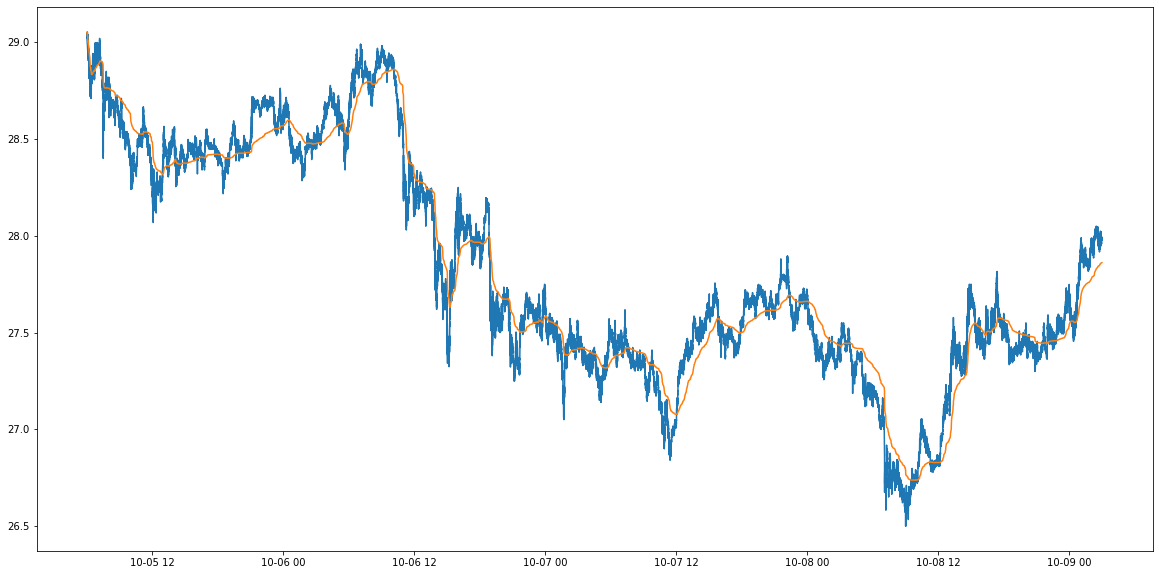

In [59]:
computeWavgTradePrice(dftrades, 10000)
plt.figure(figsize=(20,10))
plt.plot(dftrades['T'], dftrades['p'])
plt.plot(dftrades['T'], dftrades['movingAvgP10000'])

In [173]:
res.iloc[0]

date                    2020-10-11
time                      17:01:43
2                            DEBUG
3                              NaN
4                              NaN
5                              NaN
6                              vol
7                                0
8                              NaN
9                           signal
signal                      0.0029
11                             NaN
12                     signal-ewma
signal_ewma                      0
14                             NaN
15                           myask
myask                        38.54
17                             NaN
18                           mybid
mybid                      18.3344
20                             NaN
21                             mid
mid                        28.4372
timestamp      2020-10-11 17:01:43
Name: 0, dtype: object

In [305]:
! grep signal ../example.log > ../output.csv
res0 = pd.read_csv('../output.csv',sep=',| ',header=None)
res = res0.rename(columns = {0:'date',1:'time',10:'signal',13:'signal_ewma',16:'myask',19:'mybid',22:'mid',7:'vol'})
res['timestamp'] = pd.to_datetime(res['date'] + ' '+res['time'])

/Users/kangchenbai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


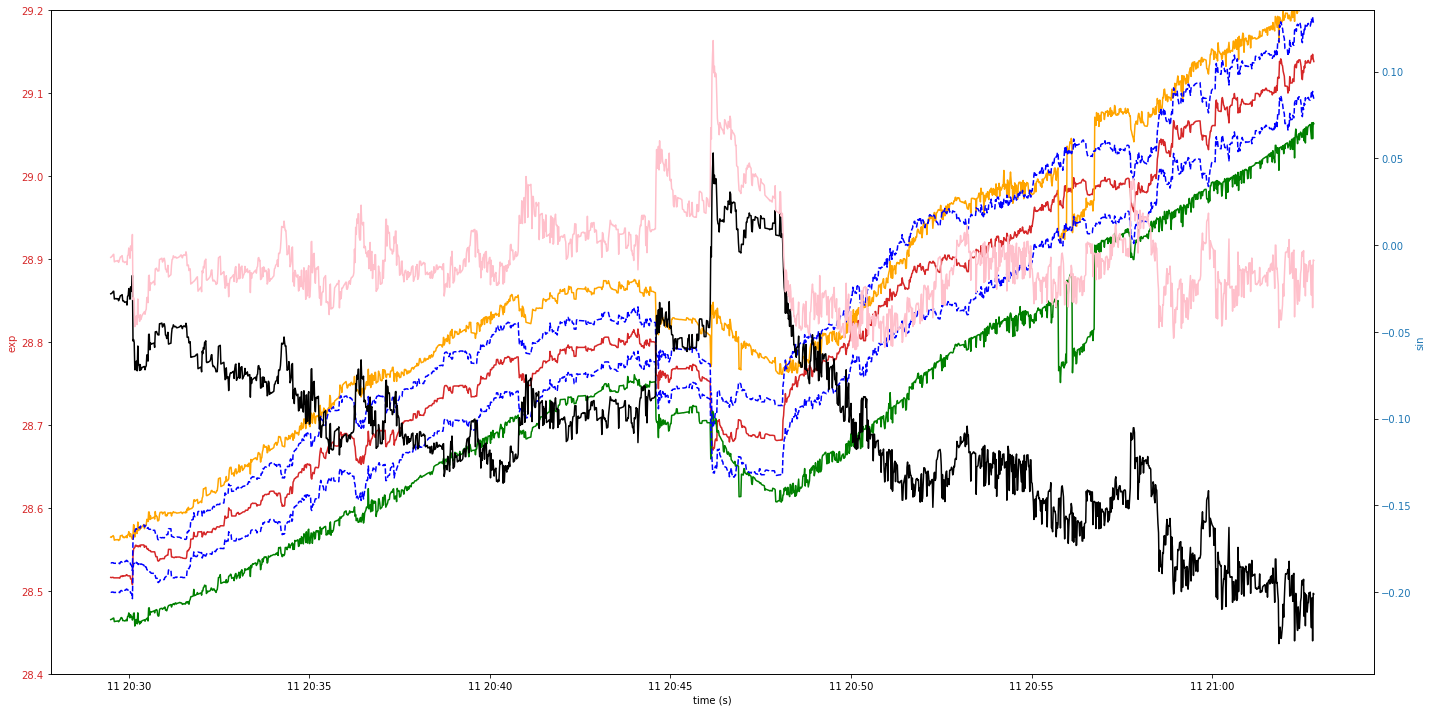

<Figure size 432x288 with 0 Axes>

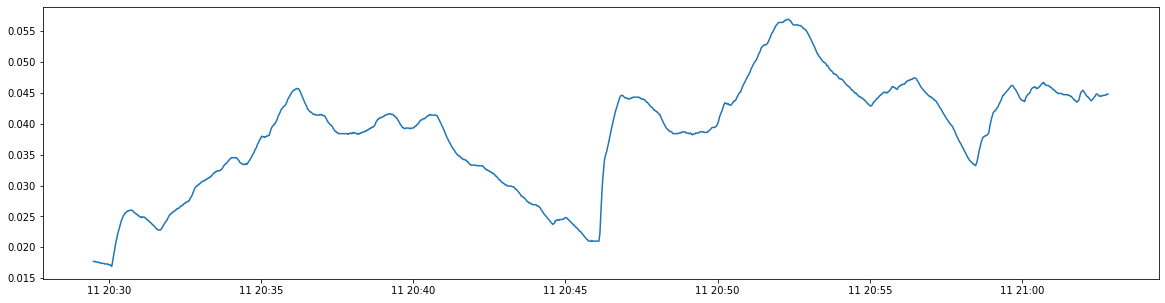

In [307]:
res = res.tail(2000)
# Create some mock data

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot( res['timestamp'],res['mid'], color=color)
ax1.plot( res['timestamp'],res['mybid'], color='green')
ax1.plot( res['timestamp'],res['myask'], color = 'orange')
ax1.plot( res['timestamp'],res['mid']-res['vol'], color = 'blue',linestyle='--')
ax1.plot( res['timestamp'],res['mid']+res['vol'], color = 'blue',linestyle='--')

plt.ylim([28.4,29.2])

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
#ax2.plot(res['time'],res[9], color=color)
ax2.plot(res['timestamp'],res['signal'], color='black')

ax2.plot(res['timestamp'],res['signal_ewma'], color='pink')

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.figure()
fig, ax1 = plt.subplots(figsize=(20,5))

plt.plot(res['timestamp'], res['vol'])